# PA 2: Classification - Decision Tree

## Student Details ( 1 Point)

Student Name and ID: DEEPESH BHATTA - 1001837305

Student Name and ID: HARSH VINOD CHALUDIA - 1001744551



Notes: When submitting, fill your name and ID in this cell.  [1 point]


Do not to forget to cite any external sources used by you.

## Programming Assignment Submission Instructions (2 Points)


Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

Do not upload the database file [-50 points]


## Programming Assignment Details (7 Points)


For this assignment use Jupyter notebook, Panda, and scikit.

1) Load Heart dataset from cardio_train.csv  [1 points]


2) Create a dataframe and print the first and last five records of your dataset.  [2 points]


3) Print the class labels.  [2 points]


4) Split your dataset 70% for training, and 30% for testing the classifier.  [2 points]


# DecisionTree (10 Points)
1) Use gini and entropy to measure the quality of a split.  [2 points]


2) Use comments to explain your code and variable names. [1 point]


3) Calculate and print the confusion matrix, and the classification Report (includes: precision, recall, f1-score, and support).  [2 points]


4) Print the decision tree visualization.  [5 points]


# Naive Bayes (10 Points)


1) Use Naive bayes classifier (Gaussian) to predict the test data[5 point] 


2) Use comments to explain your code and variable names[1 point]


3) Calculate and print the confusion matrix, and the classification Report (includes: precision, recall, f1-score, and support).  [4 points]


## Report (20 Points)


1) Describe the Decision Tree methods, and Naive Bayes classifier. Dont copy paste it from the internet. Write it on your own.  [4 points]


2) Describe the datasets [3 points] and if you have done any pre-processing , and your code. [2 points]


4) Visualization of the decision tree for gini and entropy.[5 points]


5) Interpret your results, and do not forget to compare gini and entropy [6 points]

Do not to forget to cite your sources!


## Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn.

# - - - - - - - - - - - - - - - Solution - - - - - - - - - - - - - - - - - - 

In [115]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
#read the csv file into a Pandas data frame
df_data = pd.read_csv('cardio_train.csv', encoding='latin1', sep = ';')
#return the first 5 rows of the dataset
df_data.to_csv('cardio1.csv', index = False)
df_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [116]:
df_data.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [117]:
df_data.isnull()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,False,False,False,False,False,False,False,False,False,False,False,False,False
69996,False,False,False,False,False,False,False,False,False,False,False,False,False
69997,False,False,False,False,False,False,False,False,False,False,False,False,False
69998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [118]:
df_data['gender'] = df_data['gender'].replace(1, 0)
df_data['gender'] = df_data['gender'].replace(2, 1)
#df_data['gender']= df_data['gender'].replace(1,'female') #replace gender value 1 to female
#df_data['gender']= df_data['gender'].replace(2,'male') #replace gender value 2 to male
#df_data['cholesterol']= df_data['cholesterol'].replace(1,'average') #replacing colestrol and all
#df_data['cholesterol']= df_data['cholesterol'].replace(2,'aboveaverage')
#df_data['cholesterol']= df_data['cholesterol'].replace(3,'high')
#df_data['gluc']= df_data['gluc'].replace(1,'average')
#df_data['gluc']= df_data['gluc'].replace(2,'aboveaverage')
#df_data['gluc']= df_data['gluc'].replace(3,'high')
print(df_data.head())
print(df_data.tail())

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       1     168    62.0    110     80            1     1      0   
1   1  20228       0     156    85.0    140     90            3     1      0   
2   2  18857       0     165    64.0    130     70            3     1      0   
3   3  17623       1     169    82.0    150    100            1     1      0   
4   4  17474       0     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
69995  99993  19240       1     168    76.0    120     80            1     1   
69996  99995  22601       0     158   126.0    140     90            2     2   
69997  99996  19066       1     183   105.0    180     90            3     1   
69998  99998  22431       0     163    72.0

In [119]:
print(df_data.columns)
print(df_data.dtypes)

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')
id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object


In [120]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(df_data.drop('cardio', axis=1))
#scaled_features = scaler.transform(df_data.drop('cardio', axis=1))
#scaled_data = pd.DataFrame(scaled_features, columns = df_data.drop('active', axis=1).columns)
#from sklearn.model_selection import train_test_split
#x = scaled_data
#y = df_data['cardio']
feature_cols = ['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
      
x = df_data[feature_cols] # Features
y = df_data.cardio # Target variable

# Splitiing Data Sets into training set and test set in the ratio of 70:30
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
# Create Decision Tree classifer object
dt_gini = DecisionTreeClassifier(criterion='gini')
dt_entropy = DecisionTreeClassifier(criterion='entropy')

# ests = {'Logistic Regression':lr,'Decision tree': dt,'Random forest': rf, 'Naive Bayes': mnb}
ests = {'Decision tree with gini index': dt_gini, 'Decision tree with entropy': dt_entropy}

for est in ests:
    print("{} score: {}%".format(est, round(cross_val_score(ests[est], x_test_data, y_test_data, cv=5).mean()*100, 3)))
    print("\n")

Decision tree with gini index score: 63.843%


Decision tree with entropy score: 63.538%




In [122]:
from sklearn import metrics

# Train Decision Tree Classifer
dt_gini = dt_gini.fit(x_training_data, y_training_data)
dt_entropy = dt_entropy.fit(x_training_data, y_training_data)

#Predict the response for test dataset
y_pred = dt_gini.predict(x_test_data)
y_pred_1 = dt_entropy.predict(x_test_data)

# Model Accuracy, how often is the classifier correct?
print(" GINI Accuracy:",metrics.accuracy_score(y_test_data, y_pred))
print(" Entropy Accuracy:",metrics.accuracy_score(y_test_data, y_pred_1))

 GINI Accuracy: 0.6414285714285715
 Entropy Accuracy: 0.6415238095238095


In [123]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtc = dtc.fit(x_training_data, y_training_data)

#Predict the response for test dataset
y_pred_2 = dtc.predict(x_test_data)

# Generate Classification Report
print(classification_report(y_test_data, y_pred_2))

# Generate Confusion Matrix
print(confusion_matrix(y_test_data, y_pred_2))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65     10539
           1       0.64      0.64      0.64     10461

    accuracy                           0.65     21000
   macro avg       0.65      0.65      0.65     21000
weighted avg       0.65      0.65      0.65     21000

[[6833 3706]
 [3742 6719]]


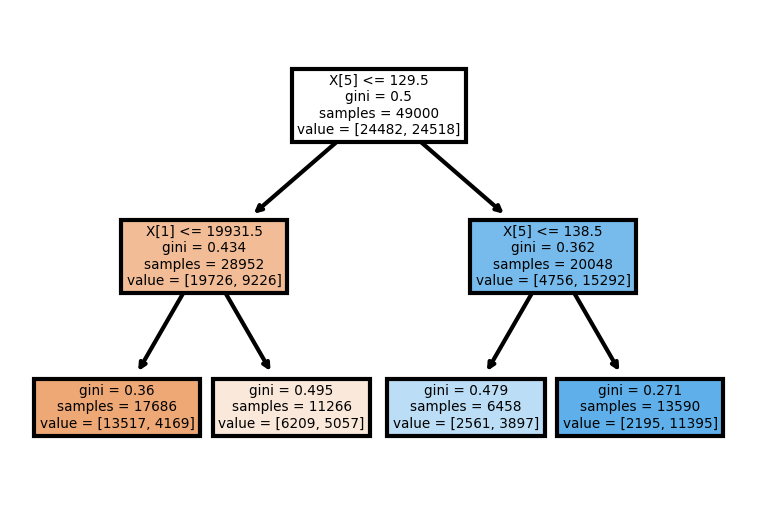

In [124]:
from sklearn import tree
dtc = DecisionTreeClassifier(max_depth = 2, ccp_alpha=0.0, class_weight=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

# Train Decision Tree Classifer
dtc = dtc.fit(x_training_data, y_training_data)

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (3,2), dpi = 300)

tree.plot_tree(dtc, filled = True);

In [125]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(x_training_data, y_training_data)

#now predicting our model to our test dataset
predicted_y = model.predict(x_test_data) 


In [126]:
print (predicted_y)



[0 0 0 ... 0 0 0]


In [127]:
# Create an empty dataframe that we have to predict 
person = pd.DataFrame()
# Create some feature values for this single row
person['id'] = [20225]
person['age'] = [18857]
person['gender'] = [1]
person['height'] = [155]
person['weight'] = [75]
person['ap_hi'] = [155]
person['ap_low'] = [80]
person['cholesterol'] = [3]
person['glu'] = [2]
person['smoke'] = [1]
person['alco'] = [1]
person['active'] = [1]
# View the data 
person

,id,age,gender,height,weight,ap_hi,ap_low,cholesterol,glu,smoke,alco,active
0,20225,18857,1,155,75,155,80,3,2,1,1,1


In [128]:
# the data is stored in Datadrame person
predicted_y = model.predict(person)
print(predicted_y)

[0]


In [129]:
# Train the model using the training sets
model.fit(x_training_data, y_training_data)

#now predicting our model to our test dataset
predicted_y = model.predict(x_test_data) 

# Generate Classification Report
print(classification_report(y_test_data, predicted_y))

# Generate Confusion Matrix
print(confusion_matrix(y_test_data, predicted_y))

              precision    recall  f1-score   support

           0       0.53      0.96      0.68     10539
           1       0.76      0.14      0.23     10461

    accuracy                           0.55     21000
   macro avg       0.64      0.55      0.46     21000
weighted avg       0.64      0.55      0.46     21000

[[10090   449]
 [ 9027  1434]]


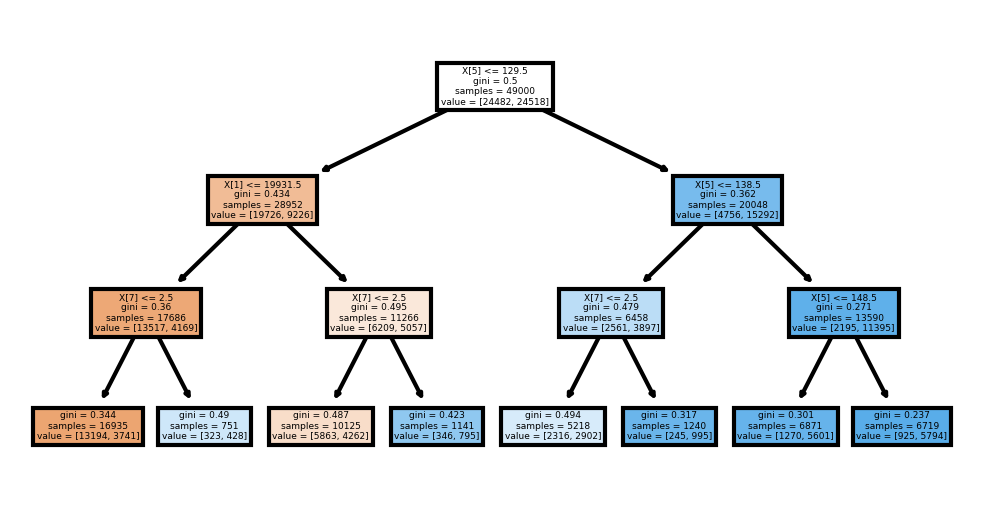

In [130]:
dt_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, ccp_alpha=0.0, class_weight=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')
# Train Decision Tree Classifer
dt_gini = dt_gini.fit(x_training_data, y_training_data)

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,2), dpi = 300)

tree.plot_tree(dt_gini, filled = True);

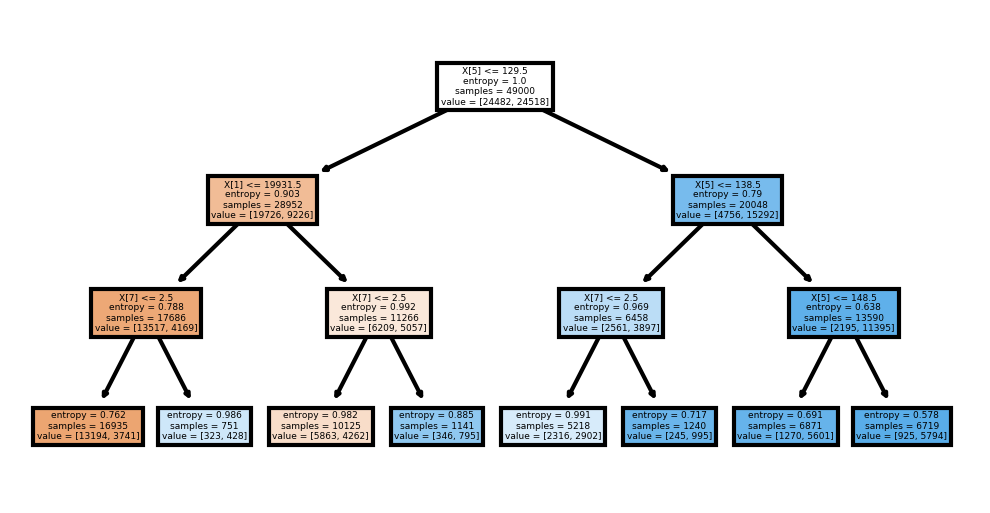

In [131]:
dt_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, ccp_alpha=0.0, class_weight=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')
# Train Decision Tree Classifer
dt_entropy = dt_entropy.fit(x_training_data, y_training_data)

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,2), dpi = 300)

tree.plot_tree(dt_entropy, filled = True);